In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV

df =pd.read_csv(r'c:\Users\vishwas.balkundi\Downloads\archive\cardio_train.csv', delimiter=';')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [18]:
df =pd.read_csv(r'c:\Users\vishwas.balkundi\Downloads\archive\cardio_train.csv', delimiter=';')
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


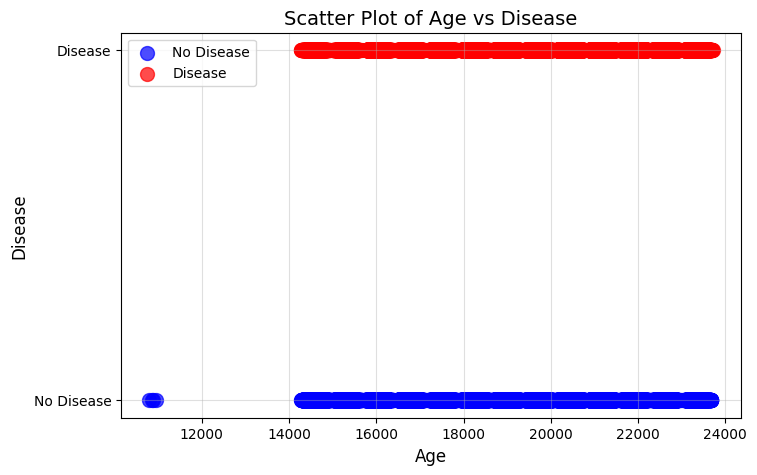

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(8, 5))
for disease, color, label in zip([0, 1], ['blue', 'red'], ['No Disease', 'Disease']):
    subset = df[df['cardio'] == disease]
    plt.scatter(subset['age'], [disease] * len(subset), color=color, label=label, s=100, alpha=0.7)

# Customize Plot
plt.yticks([0, 1], ['No Disease', 'Disease'])
plt.xlabel('Age', fontsize=12)
plt.ylabel('Disease', fontsize=12)
plt.title('Scatter Plot of Age vs Disease', fontsize=14)
plt.legend()
plt.grid(alpha=0.4)
plt.show()

<Axes: >

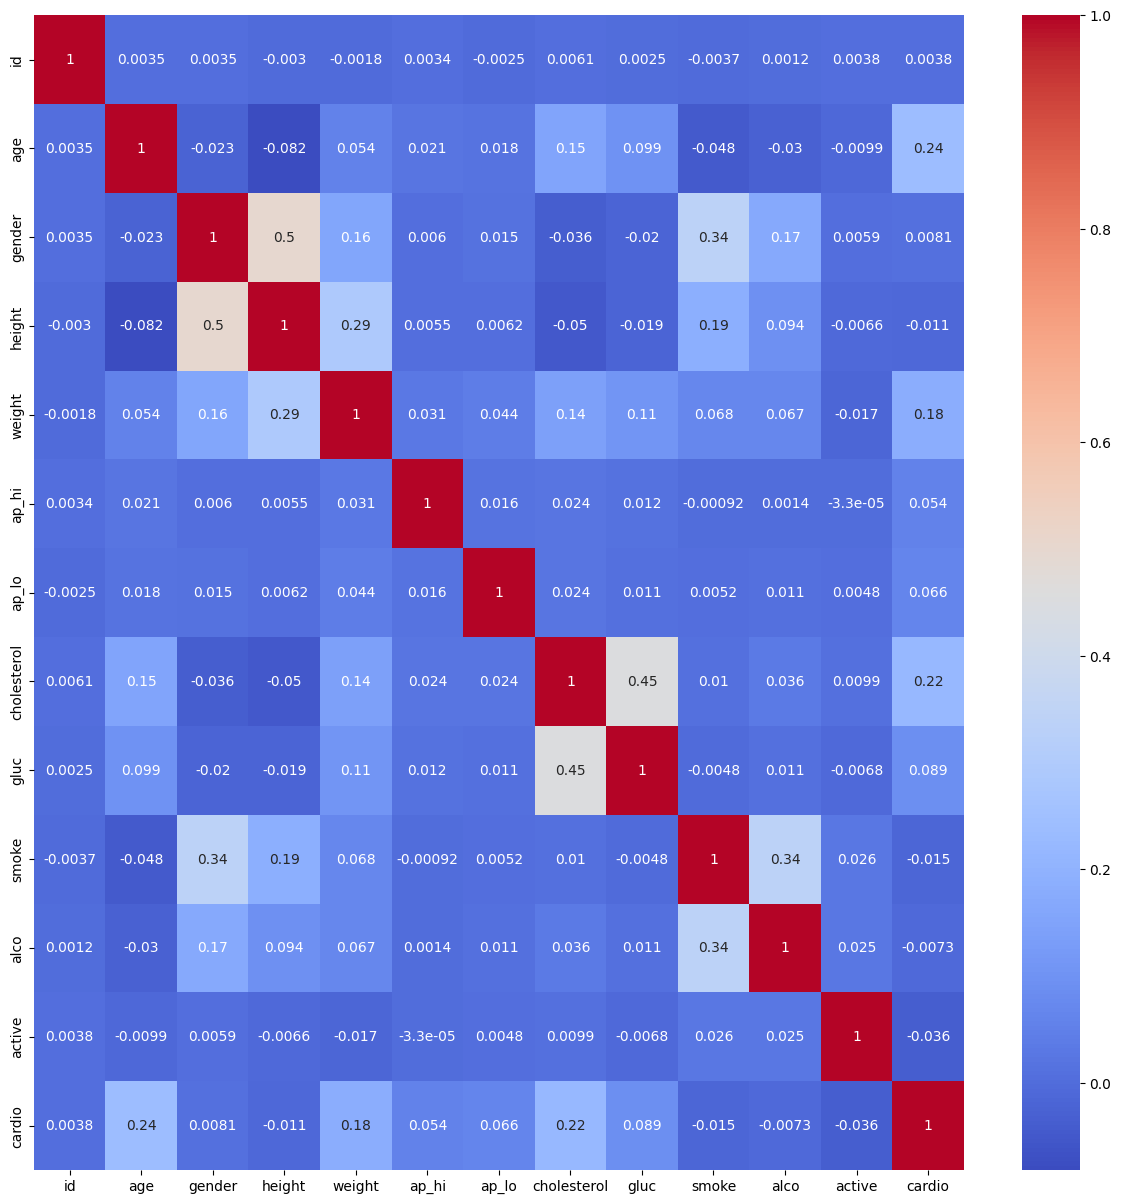

In [77]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

cardio      0      1
smoke               
0       31781  32050
1        3240   2929


<Axes: xlabel='smoke'>

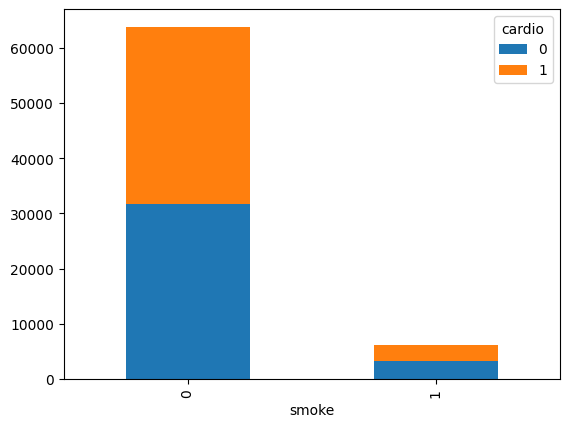

In [82]:
grouped = df.groupby(['smoke', 'cardio']).size().unstack()
print(grouped)
grouped.plot(kind='bar', stacked=True)

In [19]:
df.drop('id',axis=1,inplace=True)

In [33]:
df.nunique()

age            8076
gender            2
height          109
weight          287
ap_hi           153
ap_lo           157
cholesterol       3
gluc              3
smoke             2
alco              2
active            2
cardio            2
dtype: int64

In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
columns_to_standardize = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']
standardized_data = scaler.fit_transform(df[columns_to_standardize])

In [45]:
standardized_data

array([[-0.43606151,  0.44345206, -0.84787326, -0.12218198, -0.0882385 ],
       [ 0.30768633, -1.01816804,  0.74983117,  0.07261016, -0.03517999],
       [-0.24799666,  0.07804703, -0.70894244,  0.00767945, -0.14129701],
       ...,
       [-0.16328642,  2.27047718,  2.13913938,  0.33233302, -0.03517999],
       [ 1.20058905, -0.16555632, -0.15321916,  0.04014481, -0.0882385 ],
       [ 0.43414373,  0.68705541, -0.15321916, -0.05725127, -0.0882385 ]])

In [ ]:
# cat_df = df.drop(['age','height','weight','ap_hi','ap_lo'],axis=True)

In [50]:
standardized_df = pd.DataFrame(standardized_data, columns=columns_to_standardize)

In [51]:
standardized_df

,age,height,weight,ap_hi,ap_lo
0,-0.436062,0.443452,-0.847873,-0.122182,-0.088238
1,0.307686,-1.018168,0.749831,0.072610,-0.035180
2,-0.247997,0.078047,-0.708942,0.007679,-0.141297
3,-0.748152,0.565254,0.541435,0.137541,0.017879
4,-0.808543,-1.018168,-1.264666,-0.187113,-0.194356
...,...,...,...,...,...
69995,-0.092762,0.443452,0.124642,-0.057251,-0.088238
69996,1.269492,-0.774565,3.597913,0.072610,-0.035180
69997,-0.163286,2.270477,2.139139,0.332333,-0.035180
69998,1.200589,-0.165556,-0.153219,0.040145,-0.088238


In [52]:
df_combined = pd.concat([standardized_df, df.drop(columns=columns_to_standardize)], axis=1)

In [54]:
df = df_combined

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('cardio', axis = 1), df['cardio'], test_size = 0.2, random_state = 42)

In [56]:
from sklearn.tree import DecisionTreeClassifier

#Decision Tree Regressor object
dtr = DecisionTreeClassifier()

In [57]:
from sklearn.model_selection import GridSearchCV

#parameters for grid search
para = {
    "max_depth": [2,4,6,8],
    "min_samples_split": [2,4,6,8],
    "min_samples_leaf": [2,4,6,8],
    "random_state": [0,42]
}

#Grid search object
grid = GridSearchCV(dtr, para, cv = 5, n_jobs = -1, verbose = 1)

#fitting the grid search object
grid.fit(X_train, y_train)

#best parameters
print(grid.best_params_)

Fitting 5 folds for each of 128 candidates, totalling 640 fits
{'max_depth': 6, 'min_samples_leaf': 8, 'min_samples_split': 2, 'random_state': 0}


In [58]:
dtr = DecisionTreeClassifier( max_depth = 6, min_samples_leaf = 8, min_samples_split = 2, random_state = 0)
# max_depth = 6, min_samples_leaf = 8, min_samples_split = 2, random_state = 42
#fitting the model
dtr.fit(X_train, y_train)

#training score
print(dtr.score(X_train, y_train))

#prediction
d_pred = dtr.predict(X_test)

0.7336071428571429


In [59]:
y_pred = dtr.predict(X_test)

In [60]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.80      0.75      6988
           1       0.77      0.67      0.72      7012

    accuracy                           0.74     14000
   macro avg       0.74      0.74      0.73     14000
weighted avg       0.74      0.74      0.73     14000

Confusion Matrix:
 [[5577 1411]
 [2295 4717]]


In [67]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=150,max_depth=30,random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.71      0.74      0.73      6988
           1       0.73      0.70      0.72      7012

    accuracy                           0.72     14000
   macro avg       0.72      0.72      0.72     14000
weighted avg       0.72      0.72      0.72     14000

[[5189 1799]
 [2099 4913]]


In [68]:
df.columns

Index(['age', 'height', 'weight', 'ap_hi', 'ap_lo', 'gender', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [69]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

df =pd.read_csv(r'c:\Users\vishwas.balkundi\Downloads\archive\cardio_train.csv', delimiter=';')
# df.head()
continuous_features = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']
categorical_features = ['gender', 'cholesterol','gluc', 'smoke', 'alco', 'active']
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), continuous_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

# Fit and transform the data
processed_data = preprocessor.fit_transform(df)

In [70]:
processed_data

array([[-0.43606151,  0.44345206, -0.84787326, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.30768633, -1.01816804,  0.74983117, ...,  0.        ,
         0.        ,  1.        ],
       [-0.24799666,  0.07804703, -0.70894244, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.16328642,  2.27047718,  2.13913938, ...,  1.        ,
         1.        ,  0.        ],
       [ 1.20058905, -0.16555632, -0.15321916, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.43414373,  0.68705541, -0.15321916, ...,  0.        ,
         0.        ,  1.        ]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('cardio', axis = 1), df['cardio'], test_size = 0.2, random_state = 42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtr = DecisionTreeClassifier()

Decision tree with GridSearch
              precision    recall  f1-score   support

           0       0.71      0.80      0.75      6988
           1       0.77      0.67      0.72      7012

    accuracy                           0.74     14000
   macro avg       0.74      0.74      0.73     14000
weighted avg       0.74      0.74      0.73     14000

Confusion Matrix:
 [[5577 1411]
 [2295 4717]]